In [ ]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

from skimage.segmentation import clear_border
from PIL import Image

In [ ]:
Image_dir = os.path.join(os.getcwd(), "Images")
Image_dir

'D:\\Python workplace\\object_detection_2\\RKMVERI\\Clustering watershed\\Images'

In [ ]:
files = os.listdir(Image_dir)
files

['1.jpg',
 '2.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'IMG_2831.jpg',
 'IMG_2833.jpg',
 'IMG_2837.jpg',
 'IMG_2838.jpg',
 'IMG_2930.jpg',
 'IMG_3017.jpg',
 'IMG_4106.jpg',
 'IMG_4411.jpg',
 'IMG_4412.jpg',
 'IMG_4413.jpg',
 'IMG_4416.jpg',
 'IMG_4417.jpg']

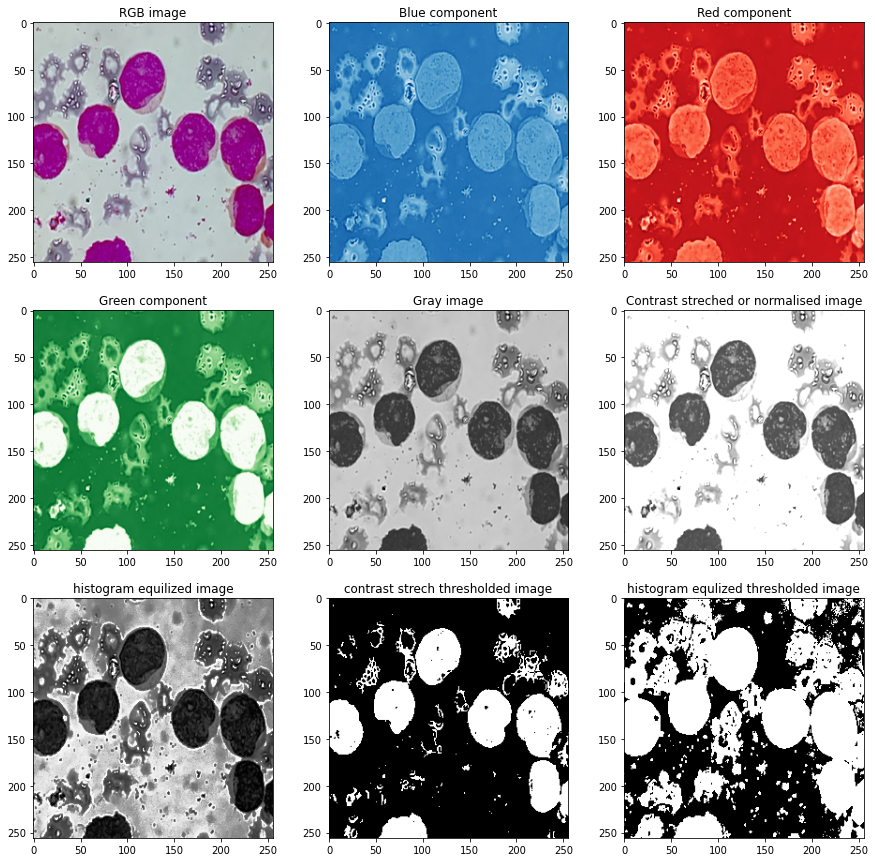

In [ ]:
fig = plt.figure(figsize=(15, 15))
random_img = 'IMG_2831.jpg'#random.choice(files)
img = cv2.imread(os.path.join(Image_dir,random_img))
fig.add_subplot(3, 3, 1)
plt.title("RGB image")
plt.imshow(img,)

b= img[:,:,0]
g= img[:,:,1]
r= img[:,:,2]

fig.add_subplot(3, 3, 2)
plt.title("Blue component")
plt.imshow(b,cmap="Blues")https://mail.google.com/mail/u/0/#search/shrijeetbiswas.calcuniv%40gmail.com/FMfcgzGlksGvPCkpLQPjwJvnhvmfFRxD

fig.add_subplot(3, 3, 3)
plt.title("Red component")
plt.imshow(r,cmap="Reds")


fig.add_subplot(3, 3, 4)
plt.title("Green component")
plt.imshow(g,cmap="Greens")

gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
fig.add_subplot(3, 3, 5)
plt.title("Gray image")
plt.imshow(gray,cmap='gray')

norm_img = cv2.normalize(gray,None,0,1.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
norm_img = np.clip(norm_img, 0, 1)
norm_img = (255*norm_img).astype(np.uint8)
fig.add_subplot(3, 3, 6)
plt.title("Contrast streched or normalised image")
plt.imshow(norm_img,cmap='gray')


histeq=cv2.equalizeHist(gray)
fig.add_subplot(3, 3, 7)
plt.title("histogram equilized image")
plt.imshow(histeq,cmap='gray')


_,thresh1 = cv2.threshold(norm_img,225,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
fig.add_subplot(3, 3, 8)
plt.title("contrast strech thresholded image")
plt.imshow(thresh1,cmap='gray')

_,bg_removed = cv2.threshold(histeq,150,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
fig.add_subplot(3, 3, 9)
plt.title("histogram equlized thresholded image")
plt.imshow(bg_removed,cmap='gray')

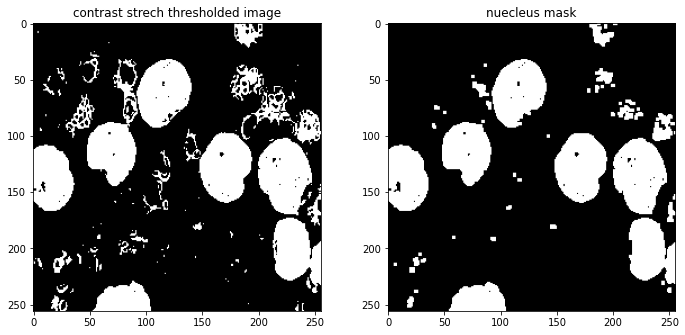

In [ ]:
fig = plt.figure(figsize=(18, 18))
fig.add_subplot(3, 3, 1)
plt.title("contrast strech thresholded image")
plt.imshow(thresh1,cmap='gray')

kernelSizes = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))]

fig.add_subplot(3,3,2)
Neucleus_mask = cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,np.ones((3,3)))
plt.title("nuecleus mask")
plt.imshow(Neucleus_mask,cmap='gray')

# fig.add_subplot(3,3,3)
# rbc_removed_closed = cv2.morphologyEx(rbc_removed_opening,cv2.MORPH_CLOSE,kernelSizes[2])
# plt.title("closing to perform hole filling")
# plt.imshow(rbc_removed_closed,cmap='gray')

# fig.add_subplot(3,3,4)
# rbc_removed_final = ~cv2.dilate(rbc_removed_closed,kernelSizes[2],iterations = 1)
# plt.title("dilate to include surrounding area")
# plt.imshow(rbc_removed_final,cmap='gray')

# WBC = bg_removed - rbc_removed_final
# fig.add_subplot(3,3,5)
# plt.title("WBC")
# plt.imshow(WBC,cmap='gray')

# fig.add_subplot(3,3,6)
# WBC_mask = cv2.morphologyEx(WBC,cv2.MORPH_OPEN,kernelSizes[3])
# plt.title("removed noise")
# plt.imshow(WBC_mask,cmap='gray')

# # fig.add_subplot(3,3,7)
# # WBC_mask_dialated = cv2.dilate(WBC_mask,kernelSizes[0],iterations = 1)
# # plt.title("dialte to include surrounding cytoplasm")
# # plt.imshow(WBC_mask_dialated,cmap='gray')

# final_img = cv2.cvtColor(WBC_mask,cv2.COLOR_GRAY2RGB)


# a,b,_ = img.shape
# for i in range(0,a):
#     for j in range(0,b):
#         if final_img[i][j][0] == 255 and final_img[i][j][1] == 255 and final_img[i][j][2] == 255:
#             final_img[i][j][0]=img[i][j][0]
#             final_img[i][j][1]=img[i][j][1]
#             final_img[i][j][2]=img[i][j][2]



# fig.add_subplot(3,3,7)
# plt.title("original image")
# plt.imshow(img)

# fig.add_subplot(3,3,8)
# plt.title("WBC mask")
# plt.imshow(final_img)

# HSV Mode

fig = plt.figure(figsize=(18, 18))
kernelSizes = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))]

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fig.add_subplot(4, 3, 1)
h=hsv[:,:,0]
plt.title("H component")
plt.imshow(h,cmap='gray')

fig.add_subplot(4, 3, 2)
s=hsv[:,:,1]
plt.title("S component")
plt.imshow(s,cmap='gray')

fig.add_subplot(4, 3, 3)
v=hsv[:,:,2]
plt.title("V component")
plt.imshow(v,cmap='gray')

norm_img = cv2.normalize(s,None,0,1.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
norm_img = np.clip(norm_img, 0, 1)
norm_img = (255*norm_img).astype(np.uint8)
fig.add_subplot(4, 3, 4)
plt.title("S component contrast streched")
plt.imshow(norm_img,cmap='gray')


fig.add_subplot(4, 3, 5)
_,rbc_removed = cv2.threshold(norm_img,50,255,cv2.THRESH_TOZERO )
plt.title("S component contrast streched thresholded\n using TOZERO")
plt.imshow(rbc_removed,cmap='gray')


fig.add_subplot(4, 3,6)
_,rbc_removed_thresh = cv2.threshold(rbc_removed,100,255,cv2.THRESH_BINARY)
plt.title("S component contrast streched thresholded\nusing TOZERO BINARY conversion(rbc removed)")
plt.imshow(rbc_removed_thresh,cmap='gray')

fig.add_subplot(4, 3,7)
rbc_removed_opening = cv2.morphologyEx(rbc_removed_thresh,cv2.MORPH_OPEN,kernelSizes[1])
plt.title("rbc removed opening")
plt.imshow(rbc_removed_opening,cmap='gray')

fig.add_subplot(4, 3,8)
rbc_removed_closed = cv2.morphologyEx(rbc_removed_opening,cv2.MORPH_CLOSE,kernelSizes[1])
plt.title("gap filling using closing")
plt.imshow(rbc_removed_closed,cmap='gray')

fig.add_subplot(4, 3,9)
rbc_removed_final = cv2.dilate(rbc_removed_closed,kernelSizes[0],iterations = 1)
plt.title("dialating the closed images \nto include surrounding area")
plt.imshow(rbc_removed_final,cmap='gray')

fig.add_subplot(4, 3,10)
rbc_removed_final = cv2.morphologyEx(rbc_removed_final,cv2.MORPH_OPEN,kernelSizes[5])
plt.title("removal of small white specs which cannot be cells")
plt.imshow(rbc_removed_final,cmap='gray')

final_img = cv2.cvtColor(rbc_removed_final,cv2.COLOR_GRAY2RGB)
a,b,_ = img.shape
for i in range(0,a):
    for j in range(0,b):
        if final_img[i][j][0] == 255 and final_img[i][j][1] == 255 and final_img[i][j][2] == 255:
            final_img[i][j][0]=img[i][j][0]
            final_img[i][j][1]=img[i][j][1]
            final_img[i][j][2]=img[i][j][2]
            
            
fig.add_subplot(4,3,11)
plt.title("original image")
plt.imshow(img)

fig.add_subplot(4,3,12)
plt.title("WBC mask")
plt.imshow(final_img)

# CMYK mode

In [ ]:
bgr = img

# Make float and divide by 255 to give BGRdash
bgrdash = bgr.astype(np.float)/255.

# Calculate K as (1 - whatever is biggest out of Rdash, Gdash, Bdash)
K = 1 - np.max(bgrdash, axis=2)

# Calculate C
C = (1-bgrdash[...,2] - K)/(1-K)

# Calculate M
M = (1-bgrdash[...,1] - K)/(1-K)

# Calculate Y
Y = (1-bgrdash[...,0] - K)/(1-K)

CMYK = (np.dstack((C,M,Y,K))* 100).astype(np.uint8)

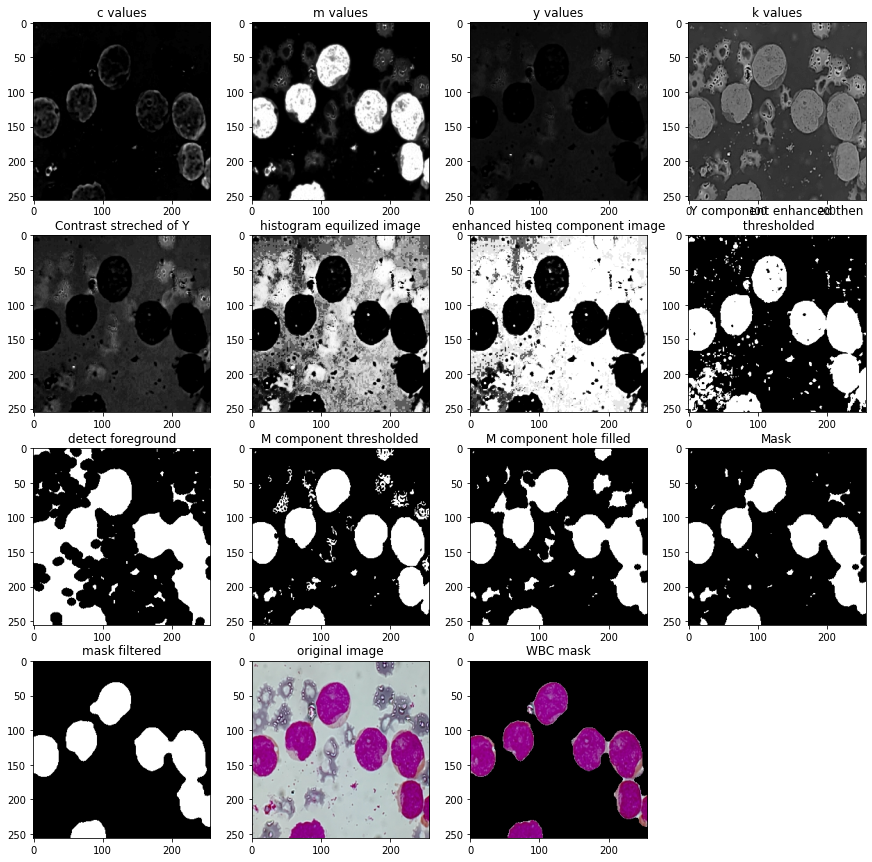

In [ ]:
c=CMYK[:,:,0]
m=CMYK[:,:,1]
y=CMYK[:,:,2]
k=CMYK[:,:,3]

fig = plt.figure(figsize=(15, 15))

fig.add_subplot(4, 4, 1)
plt.title("c values")
plt.imshow(c,cmap='gray')

fig.add_subplot(4, 4, 2)
plt.title("m values")
plt.imshow(m,cmap='gray')

fig.add_subplot(4, 4, 3)
plt.title("y values")
plt.imshow(y,cmap='gray')

fig.add_subplot(4, 4, 4)
plt.title("k values")
plt.imshow(k,cmap='gray')

norm_img = cv2.normalize(y,None,0,2.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
norm_img = np.clip(norm_img, 0, 1)
norm_img = (255*norm_img).astype(np.uint8)
fig.add_subplot(4, 4, 5)
plt.title("Contrast streched of Y")
plt.imshow(norm_img,cmap='gray')


histeq=cv2.equalizeHist(y)
fig.add_subplot(4, 4, 6)
plt.title("histogram equilized image")
plt.imshow(histeq,cmap='gray')

hist_norm_img = cv2.normalize(histeq,None,0,2.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
hist_norm_img = np.clip(hist_norm_img, 0, 1)
hist_norm_img = (255*hist_norm_img).astype(np.uint8)
fig.add_subplot(4, 4, 7)
plt.title("enhanced histeq component image")
plt.imshow(hist_norm_img,cmap='gray')

fig.add_subplot(4, 4,8)
_,thresh = cv2.threshold(hist_norm_img,50,255,cv2.THRESH_BINARY_INV)
plt.title("Y component enhanced then\n thresholded")
plt.imshow(thresh,cmap='gray')

kernelSizes = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))]

fig.add_subplot(4, 4,9)
noise_remove = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernelSizes[5])
plt.title("detect foreground")
plt.imshow(noise_remove,cmap='gray')

fig.add_subplot(4, 4,10)
_,mthresh = cv2.threshold(m,18,255,cv2.THRESH_BINARY)
plt.title("M component thresholded")
plt.imshow(mthresh,cmap='gray')

fig.add_subplot(4, 4,11)
mthresh = cv2.morphologyEx(mthresh,cv2.MORPH_CLOSE,kernelSizes[3])
plt.title("M component hole filled")
plt.imshow(mthresh,cmap='gray')

mask = cv2.bitwise_and(noise_remove,mthresh)
fig.add_subplot(4, 4,12)
plt.title("Mask")
plt.imshow(mask,cmap='gray')

fig.add_subplot(4, 4,13)
mask_filter = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelSizes[5])
plt.title("mask filtered")
plt.imshow(mask_filter,cmap='gray')

final_img = cv2.cvtColor(mask_filter,cv2.COLOR_GRAY2RGB)
a,b,_ = img.shape
for i in range(0,a):
    for j in range(0,b):
        if final_img[i][j][0] == 255 and final_img[i][j][1] == 255 and final_img[i][j][2] == 255:
            final_img[i][j][0]=img[i][j][0]
            final_img[i][j][1]=img[i][j][1]
            final_img[i][j][2]=img[i][j][2]


fig.add_subplot(4,4,14)
plt.title("original image")
plt.imshow(img)

fig.add_subplot(4,4,15)
plt.title("WBC mask")
plt.imshow(final_img)

(65536, 1)


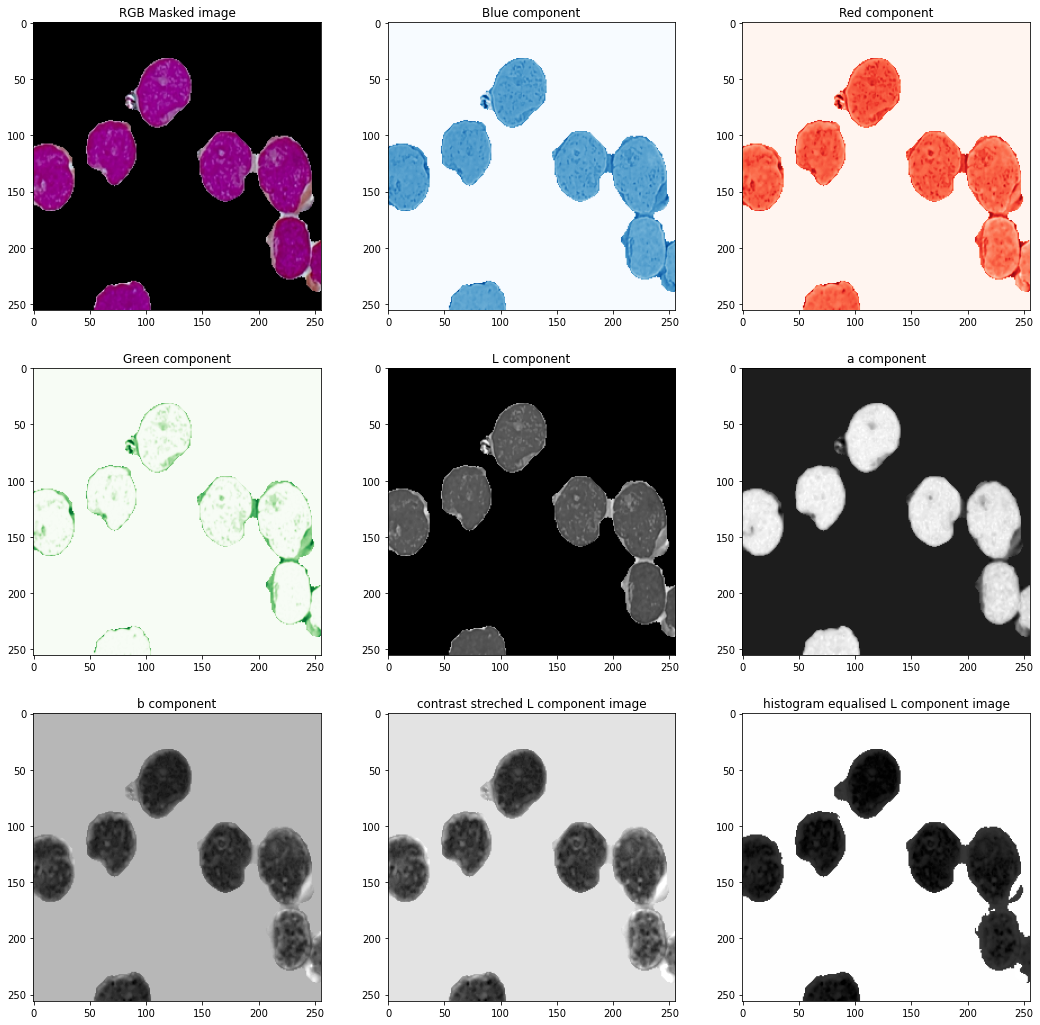

In [ ]:
fig = plt.figure(figsize=(18, 18))

fig.add_subplot(3,3, 1)
plt.title("RGB Masked image")
plt.imshow(final_img)


b= final_img[:,:,0]
g= final_img[:,:,1]
r= final_img[:,:,2]

fig.add_subplot(3,3, 2)
plt.title("Blue component")
plt.imshow(b,cmap="Blues")

fig.add_subplot(3,3, 3)
plt.title("Red component")
plt.imshow(r,cmap="Reds")

fig.add_subplot(3,3, 4)
plt.title("Green component")
plt.imshow(g,cmap="Greens")

lab = cv2.cvtColor(final_img,cv2.COLOR_RGB2Lab)
l,a,b = cv2.split(lab)

fig.add_subplot(3,3, 5)
plt.title("L component")
plt.imshow(l,cmap="gray")

fig.add_subplot(3,3, 6)
plt.title("a component")
plt.imshow(a,cmap="gray")

fig.add_subplot(3,3, 7)
plt.title("b component")
plt.imshow(b,cmap="gray")


l_norm = cv2.normalize(b,None,0,1.25, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
l_norm = np.clip(l_norm, 0, 1)
l_norm = (255*l_norm).astype(np.uint8)
fig.add_subplot(3,3, 8)
plt.title("contrast streched L component image")
plt.imshow(l_norm,cmap='gray')

fig.add_subplot(3,3,9)
histeq=cv2.equalizeHist(b)
plt.title("histogram equalised L component image")
plt.imshow(histeq,cmap='gray')

# print(a.shape,b.shape)
# ab_channel = cv2.merge([a,b])
# print(ab_channel.shape)

vectorized = a.reshape((-1,1))
print(vectorized.shape)



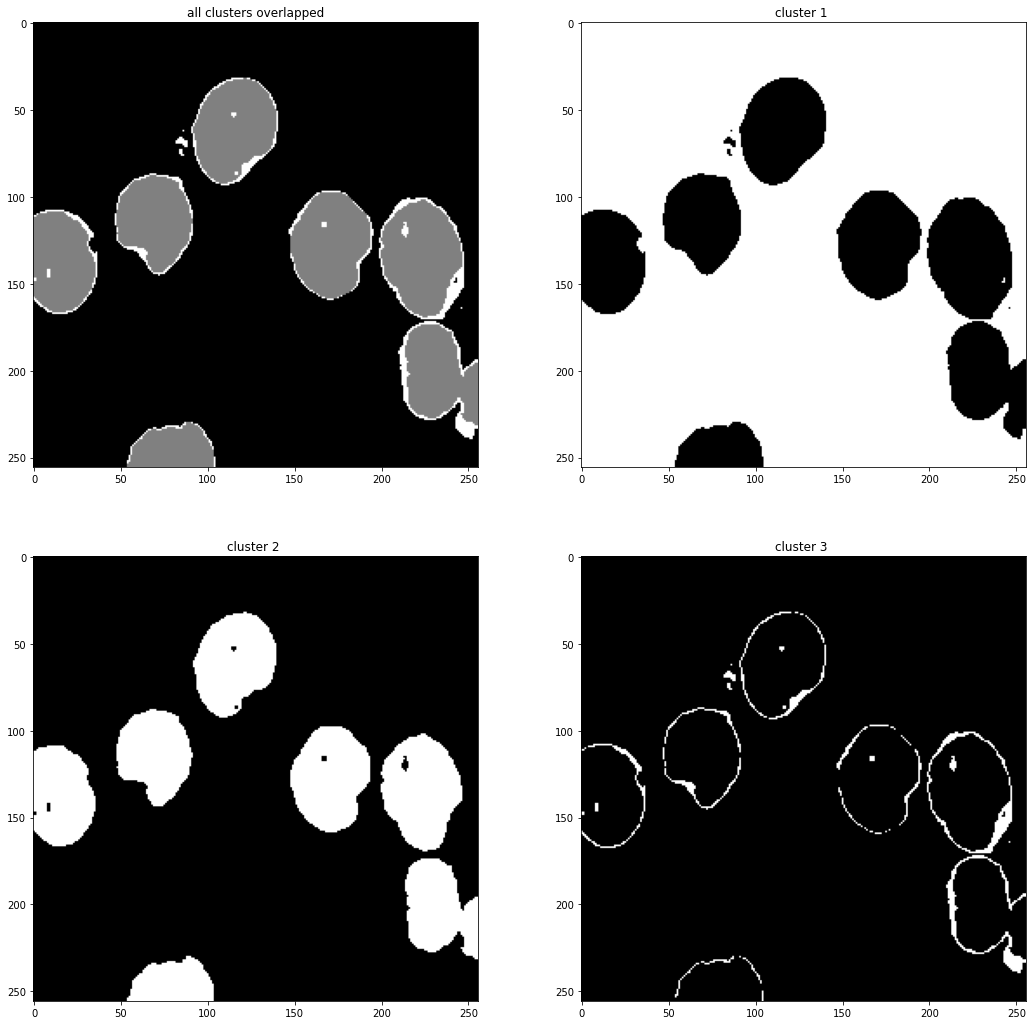

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3,random_state=613)
Kmean.fit(vectorized)

# Reshape result back into a 2D array, where each element represents the
# corresponding pixel's cluster index (0 to K - 1).
clustering = np.reshape(np.array(Kmean.labels_, dtype=np.uint8), (final_img.shape[0], final_img.shape[1]))

# Sort the cluster labels in order of the frequency with which they occur.
sortedLabels = sorted([n for n in range(3)],
    key=lambda x: -np.sum(clustering == x))



# Initialize K-means grayscale image; set pixel colors based on clustering.
kmeansImage = np.zeros(final_img.shape[:2], dtype=np.uint8)

kmeansImage_1 = np.zeros(final_img.shape[:2], dtype=np.uint8)
kmeansImage_2 = np.zeros(final_img.shape[:2], dtype=np.uint8)
kmeansImage_3 = np.zeros(final_img.shape[:2], dtype=np.uint8)

for i, label in enumerate(sortedLabels):
    kmeansImage[clustering == label] = int((255) / (3 - 1)) * i

kmeansImage_1[clustering==0]  = 255
kmeansImage_2[clustering==1]  = 255
kmeansImage_3[clustering==2]  = 255
# kmeansImage.shape

fig = plt.figure(figsize=(18, 18))

fig.add_subplot(2, 2, 1)
plt.title("all clusters overlapped")
plt.imshow(kmeansImage,cmap='gray')

fig.add_subplot(2, 2, 2)
plt.title("cluster 1 ")
plt.imshow(kmeansImage_1,cmap='gray')

fig.add_subplot(2, 2, 3)
plt.title("cluster 2 ")
plt.imshow(kmeansImage_2,cmap='gray')

fig.add_subplot(2, 2, 4)
plt.title("cluster 3 ")
plt.imshow(kmeansImage_3,cmap='gray')

fig.savefig("IMG_2838_kmeans_v1.jpg")

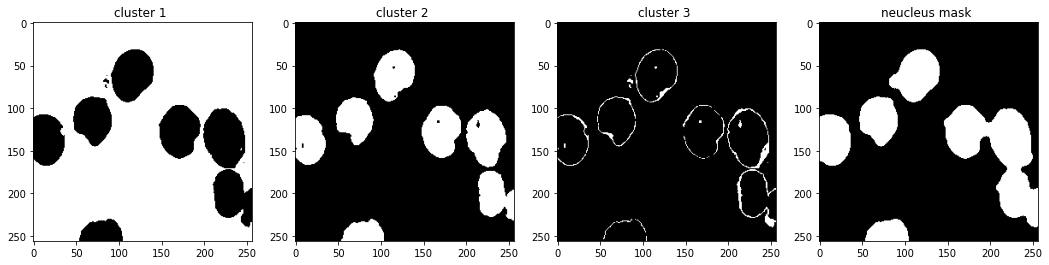

In [ ]:
fig = plt.figure(figsize=(18, 18))

fig.add_subplot(1, 4, 1)
plt.title("cluster 1 ")
plt.imshow(kmeansImage_1,cmap='gray')


fig.add_subplot(1, 4, 2)
plt.title("cluster 2 ")
plt.imshow(kmeansImage_2,cmap='gray')


fig.add_subplot(1, 4, 3)
plt.title("cluster 3 ")
plt.imshow(kmeansImage_3,cmap='gray')

fig.add_subplot(1, 4, 4)
plt.title("neucleus mask ")
plt.imshow(mask_filter,cmap='gray')

#fig.savefig("IMG_2838_kmeans_v2.jpg")
#perform IOU with all 3 clusters , the cluster giving highest percentage is our neucleus region

In [ ]:
intersection = np.logical_and(mask_filter, kmeansImage_1)
union = np.logical_or(mask_filter, kmeansImage_1)
iou_score_1 = np.sum(intersection) / np.sum(union)
print("IoU socre is for region 1: ", iou_score_1)

intersection = np.logical_and(mask_filter, kmeansImage_2)
union = np.logical_or(mask_filter, kmeansImage_2)
iou_score_2 = np.sum(intersection) / np.sum(union)
print("IoU socre is for region 2: ", iou_score_2)

intersection = np.logical_and(mask_filter, kmeansImage_3)
union = np.logical_or(mask_filter, kmeansImage_3)
iou_score_3 = np.sum(intersection) / np.sum(union)
print("IoU socre is for region 3: ", iou_score_3)

IoU socre is for region 1:  0.008331298828125
IoU socre is for region 2:  0.8470604172311027
IoU socre is for region 3:  0.11595773503115687


0.008331298828125 0.8470604172311027 0.11595773503115687
kmeansImage_2
kmeansImage_1


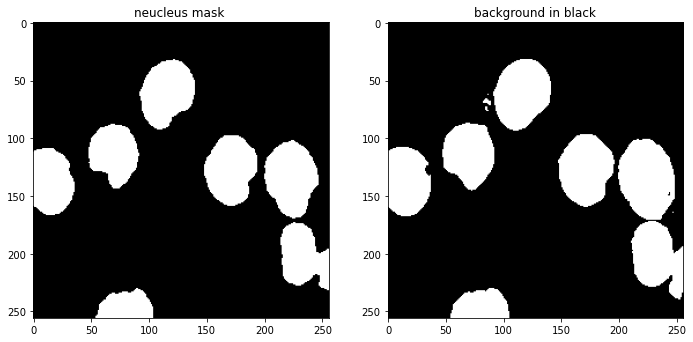

In [ ]:
fig = plt.figure(figsize=(18, 18))

temp = {"kmeansImage_1": iou_score_1,"kmeansImage_2": iou_score_2,"kmeansImage_3": iou_score_3}
print(iou_score_1,iou_score_2,iou_score_3)
max_iou = max(temp,key=temp.get)
print( max_iou)

if max_iou == 'kmeansImage_1':
    neucleus_cluster = kmeansImage_1
elif max_iou == 'kmeansImage_2':
    neucleus_cluster = kmeansImage_2
else:
    neucleus_cluster = kmeansImage_3


min_iou = min(temp,key=temp.get)
print( min_iou)

if min_iou == 'kmeansImage_1':
    bg = ~kmeansImage_1
elif min_iou == 'kmeansImage_2':
    bg = ~kmeansImage_2
else:
    bg = ~kmeansImage_3

kernelSizes = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))]

neucleus_cluster = cv2.morphologyEx(neucleus_cluster,cv2.MORPH_OPEN,kernelSizes[0])
neucleus_cluster = cv2.morphologyEx(neucleus_cluster,cv2.MORPH_CLOSE,kernelSizes[1])

fig.add_subplot(1, 3, 1)
plt.title("neucleus mask ")
plt.imshow(neucleus_cluster,cmap='gray')

fig.add_subplot(1, 3, 2)
plt.title("background in black")
plt.imshow(bg,cmap='gray')

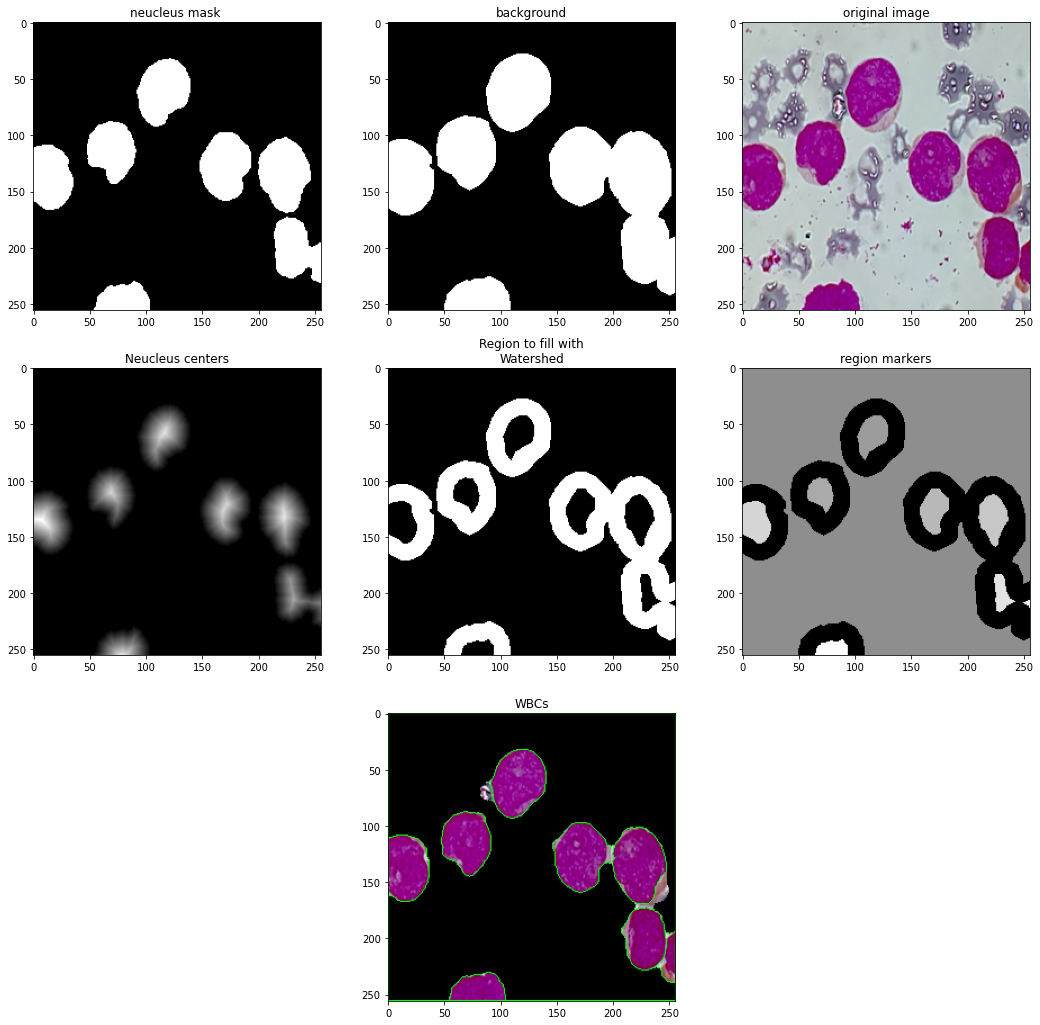

In [ ]:
fig = plt.figure(figsize=(18, 18))
kernelSizes = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),
               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))]


bg = cv2.morphologyEx(bg,cv2.MORPH_OPEN,kernelSizes[1])

fig.add_subplot(3, 3, 1)
plt.title("neucleus mask ")
plt.imshow(neucleus_cluster,cmap='gray')

sure_bg = bg.copy()
sure_bg= cv2.dilate(sure_bg,kernelSizes[1],iterations=2)
fig.add_subplot(3, 3, 2)
plt.title("background")
plt.imshow(sure_bg,cmap='gray')

fig.add_subplot(3,3,3)
plt.title("original image")
plt.imshow(img)

distance_trans = cv2.distanceTransform(neucleus_cluster,cv2.DIST_L2,3)
_,neucleus_center = cv2.threshold(distance_trans,0.4*distance_trans.max(),255,0)
#neucleus_center = clear_border(neucleus_center)


fig.add_subplot(3,3,4)
plt.title("Neucleus centers")
plt.imshow(distance_trans,cmap='gray')

# Finding unknown region
sure_fg = np.uint8(neucleus_center)
unknown = cv2.subtract(sure_bg,sure_fg)
#unknown  = clear_border(unknown )

fig.add_subplot(3,3,5)
plt.title("Region to fill with\nWatershed")
plt.imshow(unknown,cmap='gray')

_,markers = cv2.connectedComponents(sure_fg,connectivity =8)
markers = markers+10

markers[unknown==255]=0

fig.add_subplot(3,3,6)
plt.title("region markers")
plt.imshow(markers,cmap='gray')

markers = cv2.watershed(final_img,markers)
final_img[markers==-1]=[0,255,0]

fig.add_subplot(3,3,8)
plt.title("WBCs")
plt.imshow(final_img)

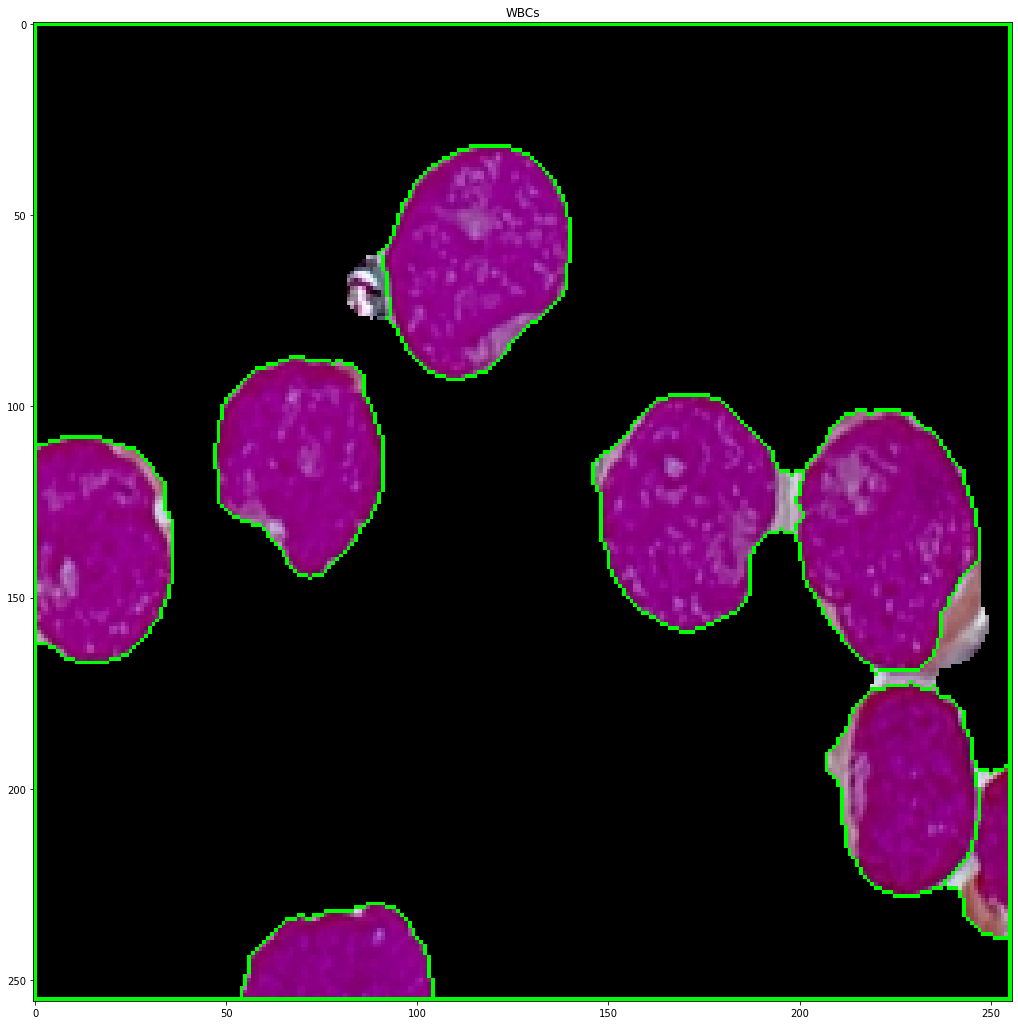

In [ ]:
fig = plt.figure(figsize=(18, 18))
plt.title("WBCs")
plt.imshow(final_img)

In [ ]:
img.shape

(256, 256, 3)